<a href="https://colab.research.google.com/github/annawang021/flight_delays/blob/main/logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("annawang021/jan24flights-cleaned")

print("Path to dataset files:", path)

100%|██████████| 9.15M/9.15M [00:00<00:00, 116MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/annawang021/jan24flights-cleaned/versions/3


In [31]:
df = pd.read_csv(path + "/cleaned_data.csv")
df.head()

,FL_DATE,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY_NEW,DISTANCE
0,1/1/2024 12:00:00 AM,AA,"New York, NY",NY,"Los Angeles, CA",CA,900,852.0,-8.0,1124.0,0.0,2475.0
1,1/1/2024 12:00:00 AM,AA,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232.0,-3.0,2107.0,8.0,2475.0
2,1/1/2024 12:00:00 AM,AA,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754.0,-6.0,2041.0,0.0,2611.0
3,1/1/2024 12:00:00 AM,AA,"Los Angeles, CA",CA,"Boston, MA",MA,750,742.0,-8.0,1638.0,19.0,2611.0
4,1/1/2024 12:00:00 AM,AA,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458.0,-4.0,1654.0,0.0,1009.0


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [43]:
X = df.drop(['FL_DATE','ARR_DELAY_NEW'], axis=1)
y = (df['ARR_DELAY_NEW'] > 15).astype(int)  # delays greater than 15 mins
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [47]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [49]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [51]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'DISTANCE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['MKT_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST_CITY_NAME', 'DEST_STATE_ABR'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [52]:
y_pred = model.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

accuracy: 0.9188495028771377


In [54]:
report = classification_report(y_test, y_pred)
print("classification report:\n", report)

classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     85645
           1       0.90      0.73      0.81     26098

    accuracy                           0.92    111743
   macro avg       0.91      0.85      0.88    111743
weighted avg       0.92      0.92      0.92    111743



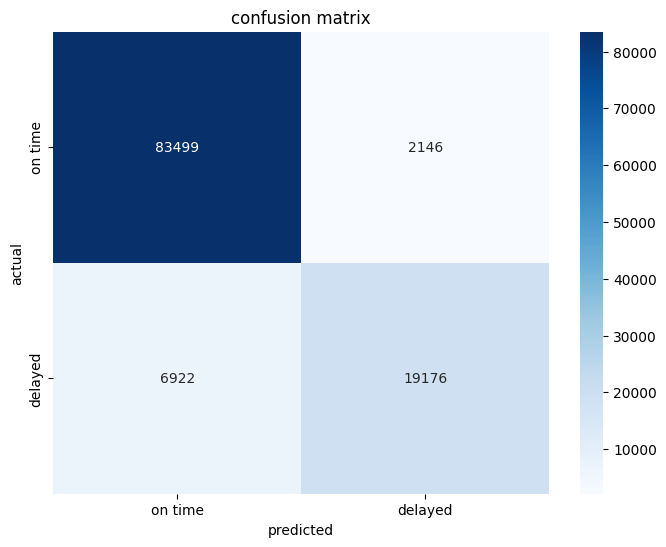

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['on time', 'delayed'],
            yticklabels=['on time', 'delayed'])
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()